In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('housing.csv')
len(df)

20640

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [5]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,near_bay
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,near_bay
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,near_bay
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,near_bay
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,near_bay


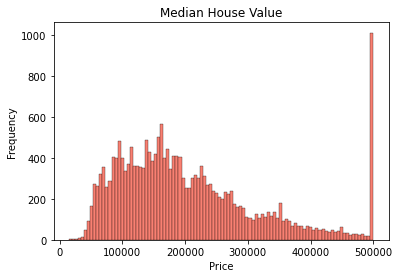

In [6]:
plt.figure(figsize=(6, 4))

sns.histplot(df.median_house_value, bins=100, color='salmon', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Median House Value')

plt.show()

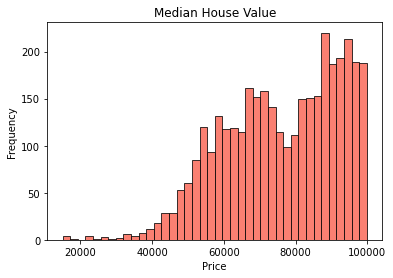

In [7]:
plt.figure(figsize=(6, 4))

sns.histplot(df.median_house_value[df.median_house_value < 100000], bins=40, color='salmon', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Median House Value')

plt.show()

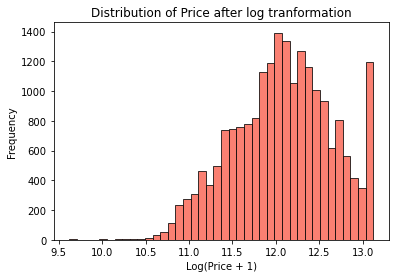

In [8]:
log_price = np.log1p(df.median_house_value)

plt.figure(figsize=(6, 4))

sns.histplot(log_price, bins=40, color='salmon', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Distribution of Price after log tranformation')

plt.show()

In [9]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [10]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


(9.5, -0.5)

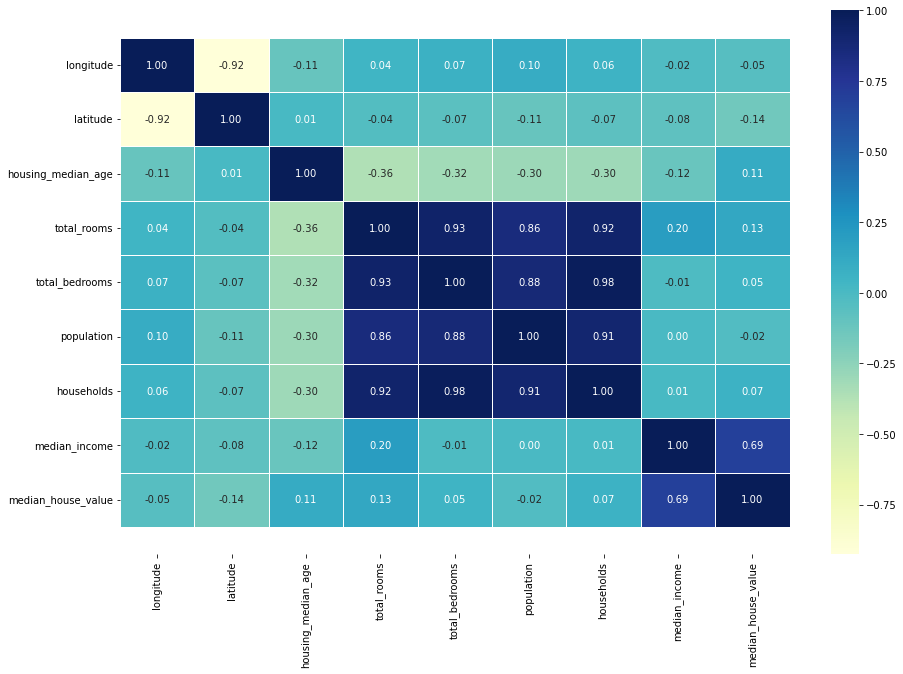

In [11]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

## Validation framework

In [12]:
np.random.seed(2)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [13]:
n_val, n_test, n_train

(4128, 4128, 12384)

In [14]:
y_train_orig = df_train.median_house_value.values
y_val_orig = df_val.median_house_value.values
y_test_orig = df_test.median_house_value.values

y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

## Linear Regression

In [15]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [16]:
base = ['longitude', 'latitude', 'total_rooms', 'total_bedrooms', 'population','households' ,'median_income', 'housing_median_age']

In [17]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [18]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

In [19]:
y_pred = w_0 + X_train.dot(w)

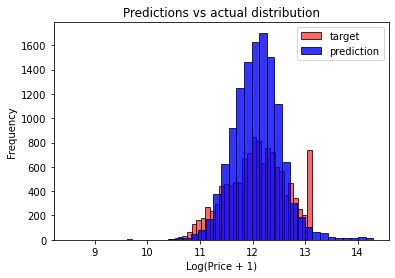

In [20]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='red', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='blue', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [21]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [22]:
rmse(y_train, y_pred)

0.34144289158719454

In [23]:
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)

In [24]:
rmse(y_val, y_pred)

0.3320912318822864

## Simple feature engineering

In [25]:
df['ocean_proximity'].value_counts()

<1h_ocean     9136
inland        6551
near_ocean    2658
near_bay      2290
island           5
Name: ocean_proximity, dtype: int64

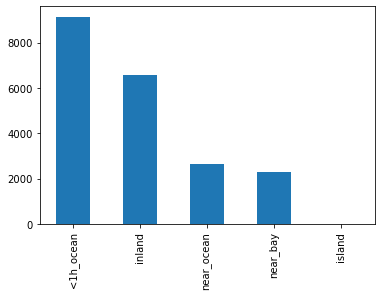

In [26]:
df["ocean_proximity"].value_counts().plot(kind="bar");

In [27]:
df['ocean_proximity'].value_counts()

<1h_ocean     9136
inland        6551
near_ocean    2658
near_bay      2290
island           5
Name: ocean_proximity, dtype: int64

In [28]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
        
    for v in ['<1h_ocean', 'inland', 'near_ocean', 'near_bay', 'island']:
        feature = 'proximity_to_ocean_%s' % v
        df[feature] = (df['ocean_proximity'] == v).astype(int)
        features.append(feature)



    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [29]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

train: 12.523331060884754
validation: 12.23698729913839


In [30]:
w_0

-1575.767107381726

In [31]:
w_0, w

(-1575.767107381726,
 array([-1.72684939e+01, -2.09564910e+01, -5.65813684e-04,  1.60520701e-02,
         1.04798367e-03, -1.89283719e-02,  2.62034170e-01, -1.38258027e-01,
         2.60317355e+02,  2.90365209e+02,  2.69625375e+02,  2.72560028e+02,
         2.78373390e+02]))

## Regularization

In [32]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [33]:
X_train = prepare_X(df_train)

In [34]:
for r in [0, 0.001, 0.01, 0.1, 1, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=10)
    print('%5s, %.2f, %.2f, %.2f' % (r, w_0, w[5], w[10]))

    0, -0.08, 0.00, -0.00
0.001, -0.08, 0.00, -0.00
 0.01, -0.08, 0.00, -0.00
  0.1, -0.08, 0.00, -0.00
    1, -0.08, 0.00, -0.00
   10, -0.08, 0.00, -0.00


In [35]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0)

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('val', rmse(y_val, y_pred))

train 12.523331060884754
val 12.23698729913839


In [36]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('val', rmse(y_val, y_pred))

train 0.3302780928709454
val 0.3214119785791577


In [37]:
X_train = prepare_X(df_train)
X_val = prepare_X(df_val)

for r in [0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    print('%6s' %r, rmse(y_val, y_pred))

 1e-06 0.3214116278168021
0.0001 0.32141138985335616
 0.001 0.32141143527673877
  0.01 0.3214119785791577
   0.1 0.32142245208893583
     1 0.3215282971312718
     5 0.32161987841177825
    10 0.32164305647478514


In [38]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

X_test = prepare_X(df_test)
y_pred = w_0 + X_test.dot(w)
print('test:', rmse(y_test, y_pred))

validation: 0.3214119785791577
test: 0.3362804066692328


## Using the model

In [39]:
i = 3
ad = df_test.iloc[i].to_dict()
ad

{'longitude': -122.28,
 'latitude': 37.49,
 'housing_median_age': 25.0,
 'total_rooms': 7335.0,
 'total_bedrooms': 1157.0,
 'population': 2626.0,
 'households': 1049.0,
 'median_income': 6.5475,
 'ocean_proximity': 'near_ocean'}

In [40]:
X_test = prepare_X(pd.DataFrame([ad]))[0]
y_pred = w_0 + X_test.dot(w)
suggestion = np.expm1(y_pred)
suggestion

379244.08737278305